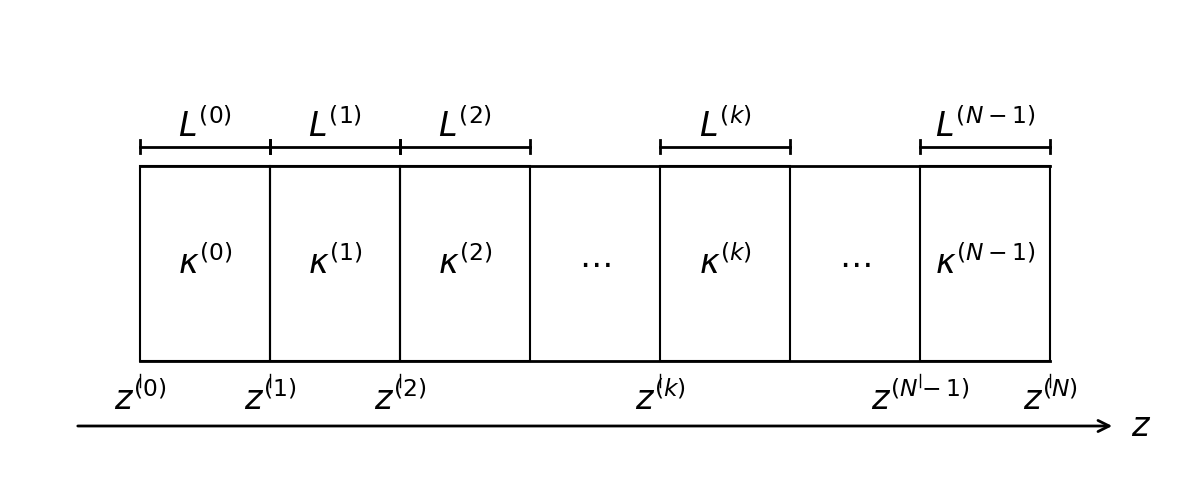

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch


def create_qpm_device_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # 基本設定
    layer_width = 1.0
    layer_height = 1.5
    y_base = 0
    x_start = 0

    # レイヤー情報の定義
    layers = [
        {'index': 0, 'x': x_start},
        {'index': 1, 'x': x_start + layer_width},
        {'index': 2, 'x': x_start + 2*layer_width},
        {'index': 'k', 'x': x_start + 4*layer_width},
        {'index': 'N-1', 'x': x_start + 6*layer_width}
    ]

    # 各レイヤーを描画
    for i, layer in enumerate(layers):
        x = layer['x']
        idx = layer['index']

        # レイヤーボックス
        rect = patches.Rectangle((x, y_base), layer_width, layer_height,
                                 linewidth=1.5, edgecolor='black', facecolor='none')
        ax.add_patch(rect)

        # κ ラベル
        if isinstance(idx, int):
            kappa_text = rf'$\kappa^{{({idx})}}$'
            L_text = rf'$L^{{({idx})}}$'
            z_left = rf'$z^{{({idx})}}$'
            z_right = rf'$z^{{({idx+1})}}$'
        else:
            if idx == 'k':
                kappa_text = r'$\kappa^{(k)}$'
                L_text = r'$L^{(k)}$'
                z_left = r'$z^{(k)}$'
                z_right = r'$z^{(k+1)}$'
            else:  # N-1
                kappa_text = r'$\kappa^{(N-1)}$'
                L_text = r'$L^{(N-1)}$'
                z_left = r'$z^{(N-1)}$'
                z_right = r'$z^{(N)}$'

        # κ ラベル（レイヤー中央）
        ax.text(x + layer_width/2, y_base + layer_height/2, kappa_text,
                ha='center', va='center', fontsize=24, weight='bold')

        # L ラベル（上部）
        ax.text(x + layer_width/2, y_base + layer_height + 0.3, L_text,
                ha='center', va='center', fontsize=24)

        # L の線（上部）
        ax.plot([x, x + layer_width], [y_base + layer_height + 0.15, y_base + layer_height + 0.15],
                'k-', linewidth=2)
        ax.plot([x, x], [y_base + layer_height + 0.1, y_base + layer_height + 0.2],
                'k-', linewidth=2)
        ax.plot([x + layer_width, x + layer_width],
                [y_base + layer_height + 0.1, y_base + layer_height + 0.2], 'k-', linewidth=2)

        # z ラベル（下部）
        ax.text(x, y_base - 0.3, z_left, ha='center', va='center', fontsize=24)
        ax.plot([x, x], [y_base - 0.1, y_base - 0.2], 'k-', linewidth=1)

        # 最後のレイヤーの右端にもz ラベル
        if i == len(layers) - 1:
            ax.text(x + layer_width, y_base - 0.3, z_right,
                    ha='center', va='center', fontsize=24)
            ax.plot([x + layer_width, x + layer_width],
                    [y_base - 0.1, y_base - 0.2], 'k-', linewidth=1)

    # デバイスの上下を結ぶ横線（省略部分を示す）
    # 上部の横線
    ax.plot([x_start, x_start + 7*layer_width], [y_base + layer_height, y_base + layer_height],
            'k-', linewidth=2)
    # 下部の横線
    ax.plot([x_start, x_start + 7*layer_width], [y_base, y_base],
            'k-', linewidth=2)

    # 省略記号
    ax.text(x_start + 3*layer_width + layer_width/2, y_base + layer_height/2, r'$\cdots$',
            ha='center', va='center', fontsize=24, weight='bold')
    ax.text(x_start + 5*layer_width + layer_width/2, y_base + layer_height/2, r'$\cdots$',
            ha='center', va='center', fontsize=24, weight='bold')

    # z軸の矢印
    arrow = FancyArrowPatch((x_start - 0.5, y_base - 0.5),
                            (x_start + 7*layer_width + 0.5, y_base - 0.5),
                            arrowstyle='->', mutation_scale=20, linewidth=2)
    ax.add_patch(arrow)
    ax.text(x_start + 7*layer_width + 0.7, y_base - 0.5, r'$z$',
            ha='center', va='center', fontsize=24, weight='bold')

    # タイトル
#     ax.text(x_start + 3.5*layer_width, y_base + layer_height + 0.8,
#             '縦型擬似位相整合デバイス',
#             ha='center', va='center', fontsize=24, weight='bold')

    # 軸の設定
    ax.set_xlim(x_start - 1, x_start + 8*layer_width)
    ax.set_ylim(y_base - 1, y_base + layer_height + 1.2)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.tight_layout()
    return fig, ax


fig, ax = create_qpm_device_diagram()

![alt](phase_matching.png)
* (a)の図の時SH波が強め合う
図の時、$2\beta^\omega = \beta^{2\omega} \therefore \beta^{2\omega} - 2\beta^\omega = 0$

# 前提条件

SHGデバイスでは以下の非線形結合モード方程式が成り立つ

$$
\frac {d}{dz} A_\omega(z) = -j\boldsymbol\kappa(z)^*[A_\omega(z)]^*A_{2\omega}(z)e^{-j(2\Gamma)z}
$$
$$
\frac {d}{dz} A_{2\omega}(z) = -j\boldsymbol\kappa(z)[A_\omega(z)]^2e^{+j(2\Gamma)z}
$$

**NPDA（Non-Pumped Depletion Approximation）** では、基本波の振幅が伝搬中にほとんど変化しないと仮定します：
$$A_\omega(z) \approx A_{\omega}(z^{(0)}) \quad \text{(定数)}$$

この近似により、第一式は無視でき、第二式は次のように簡略化されます：
$$\frac {d}{dz} A_{2\omega}(z) = -j\kappa(z)A_{\omega}(z^{(0)})^2e^{+j(2\Gamma)z}$$

周期分極反転構造におけるSHG出力式の導出を段階的に行いましょう。

## ステップ1：基本方程式の積分

NPDAの仮定下で、第二高調波の振幅は次の微分方程式に従います：

$$\frac{d}{dz}A_{2\omega}(z) = -j\kappa(z)A_{\omega}(z^{(0)})^2e^{+j2\Gamma z}$$

デバイス全体（$z^{(0)}$から$z^{(N)}$まで）で積分すると：

$$A_{2\omega}(z^{(N)}) - A_{2\omega}(z^{(0)}) = -jA_{\omega}(z^{(0)})^2 \int_{z^{(0)}}^{z^{(N)}} \kappa(z)e^{+j2\Gamma z} dz$$

通常、入力端での第二高調波は存在しないので $A_{2\omega}(z^{(0)}) = 0$ として：

$$A_{2\omega}(z^{(N)}) = -jA_{\omega}(z^{(0)})^2 \int_{z^{(0)}}^{z^{(N)}} \kappa(z)e^{+j2\Gamma z} dz$$

## ステップ2：周期分極反転構造における積分の分解

周期分極反転構造では、各ドメイン内で $\kappa(z)$ は一定値を取ります：
- 第$k$層内（$z^{(k)} \leq z < z^{(k+1)}$）では $\kappa(z) = \kappa^{(k)}$（定数）

これにより、全体の積分を各層での積分の和に分解できます：

$$A_{2\omega}(z^{(N)}) = -jA_{\omega}(z^{(0)})^2 \sum_{k=0}^{N-1} \int_{z^{(k)}}^{z^{(k+1)}} \kappa^{(k)}e^{+j2\Gamma z} dz$$

各層内では$\kappa^{(k)}$が定数なので、積分の外に出せます：

$$A_{2\omega}(z^{(N)}) = -jA_{\omega}(z^{(0)})^2 \sum_{k=0}^{N-1} \kappa^{(k)} \int_{z^{(k)}}^{z^{(k+1)}} e^{+j2\Gamma z} dz$$

## ステップ3：各層内での積分計算

第$k$層での積分を計算します：

$$\int_{z^{(k)}}^{z^{(k+1)}} e^{+j2\Gamma z} dz = \left[\frac{e^{+j2\Gamma z}}{j2\Gamma}\right]_{z^{(k)}}^{z^{(k+1)}}$$

$$= \frac{1}{j2\Gamma}\left[e^{j2\Gamma z^{(k+1)}} - e^{j2\Gamma z^{(k)}}\right]$$

$$= \frac{e^{j2\Gamma z^{(k)}}}{j2\Gamma}\left[e^{j2\Gamma(z^{(k+1)} - z^{(k)})} - 1\right]$$

ここで、$L^{(k)} = z^{(k+1)} - z^{(k)}$（第$k$層の長さ）とすると：

$$= \frac{e^{j2\Gamma z^{(k)}}}{j2\Gamma}\left[e^{j2\Gamma L^{(k)}} - 1\right]$$

指数関数の性質を使って変形：
$$e^{j2\Gamma L^{(k)}} - 1 = 2j\sin(\Gamma L^{(k)})e^{j\Gamma L^{(k)}}$$

これを代入すると：
$$\int_{z^{(k)}}^{z^{(k+1)}} e^{+j2\Gamma z} dz = \frac{e^{j2\Gamma z^{(k)}}}{j2\Gamma} \cdot 2j\sin(\Gamma L^{(k)})e^{j\Gamma L^{(k)}}$$

$$= \frac{L^{(k)}\sin(\Gamma L^{(k)})}{\Gamma L^{(k)}} e^{j2\Gamma z^{(k)}} e^{j\Gamma L^{(k)}}$$

## 最終結果

これらをまとめると、各層の寄与を分離して表現すると：

$$\tilde{A}_{2\omega}^{(k)} = -j\kappa^{(k)}A_{\omega}(z^{(0)})^2 L^{(k)} e^{j\Gamma L^{(k)}} \cdot \frac{\sin(\Gamma L^{(k)})}{\Gamma L^{(k)}}$$

したがって、デバイス全体の出力は：

$$A_{2\omega}(z^{(N)}) = \sum_{k=0}^{N-1} \tilde{A}_{2\omega}^{(k)} \cdot e^{j2\Gamma z^{(k)}}$$

これで求めたい式が導出されました。この式は任意の周期分極反転構造に適用でき、各層の非線形結合係数と長さに応じたSHG効率を計算できます。

## フーリエ変換との対応

**SHGデバイスの物理的な範囲（$z^{(0)}$から$z^{(N)}$）の外側で非線形結合係数 $\kappa(z)$ がゼロであると定義する**ことで、変換効率を決定する積分は、数学的に厳密なフーリエ変換そのものと見なすことができます。

この考え方をもう少し詳しく整理してみましょう。

### 1. デバイス関数としての $\kappa(z)$ の再定義

まず、デバイスの物理的構造を反映した関数 $\kappa_{device}(z)$ を考えます。この関数は、デバイスの内部では与えられた分極反転構造を持ち、外部ではゼロであると定義します。

$$
\kappa_{device}(z) =
\begin{cases}
\kappa(z) & z^{(0)} \le z \le z^{(N)} \text{ の場合} \\
0 & \text{それ以外の場合}
\end{cases}
$$

この新しい関数 $\kappa_{device}(z)$ を用いると、ステップ1で導かれた積分は、積分範囲を無限大に拡張しても値が変わりません。

$$
A_{2\omega}(z^{(N)}) = -jA_{\omega}(z^{(0)})^2 \int_{z^{(0)}}^{z^{(N)}} \kappa(z)e^{+j2\Gamma z} dz = -jA_{\omega}(z^{(0)})^2 \int_{-\infty}^{\infty} \kappa_{device}(z)e^{+j2\Gamma z} dz
$$

### 2. フーリエ変換との完全な対応

ここで、フーリエ変換の定義（角周波数 $k$ を用いる場合）を再確認します。
$$
\mathcal{F}[f(z)](k) = \tilde{f}(k) = \int_{-\infty}^{\infty} f(z) e^{-ikz} dz
$$

この定義と比較すると、SHG出力の積分項は、$\kappa_{device}(z)$ のフーリエ変換 $\tilde{\kappa}_{device}(k)$ において、$k = -2\Gamma$ を代入したものに他なりません。

$$
\int_{-\infty}^{\infty} \kappa_{device}(z)e^{+j2\Gamma z} dz = \int_{-\infty}^{\infty} \kappa_{device}(z)e^{-j(-2\Gamma)z} dz = \tilde{\kappa}_{device}(-2\Gamma)
$$

したがって、第二高調波の出力振幅は次のように厳密に記述できます。

$$
A_{2\omega}(z^{(N)}) = -jA_{\omega}(z^{(0)})^2 \cdot \tilde{\kappa}_{device}(-2\Gamma)
$$

## ヒルベルト空間における座標変換としての理解

前節で示したフーリエ変換との対応関係を、ヒルベルト空間における座標変換の観点から詳しく見てみましょう。

### 1. 物理的直観：位置に依存する位相回転

SHGデバイスにおいて、位置 $z$ で発生した第二高調波が出力端 $z^{(N)}$ に到達するまでに受ける位相回転を考えます。

位置 $z$ での基本波の位相を $\phi_\omega(z) = \beta_\omega z$ とすると：
- 位置 $z$ で発生するSH波の初期位相：$2\phi_\omega(z) = 2\beta_\omega z$（基本波2個分）
- SH波が $z$ から $z^{(N)}$ まで伝搬する際の位相：$\beta_{2\omega}(z^{(N)} - z)$
- 出力端でのSH波の全位相：$2\beta_\omega z + \beta_{2\omega}(z^{(N)} - z)$

異なる位置 $z'$ で発生したSH波との相対位相差は：
$\Delta\phi = [2\beta_\omega z + \beta_{2\omega}(z^{(N)} - z)] - [2\beta_\omega z' + \beta_{2\omega}(z^{(N)} - z')]$
$= 2\beta_\omega(z - z') - \beta_{2\omega}(z - z')$
$= (2\beta_\omega - \beta_{2\omega})(z - z')$

ここで $\Gamma = \frac{\beta_{2\omega} - 2\beta_\omega}{2}$ の定義を使うと：
$\Delta\phi = -2\Gamma(z - z')$

したがって、位置 $z$ で発生した波の相対的な位相因子は $e^{j2\Gamma z}$ となります。

### 2. ヒルベルト空間における基底展開

関数空間 $L^2(\mathbb{R})$ において、非線形結合係数 $\kappa(z)$ を2つの異なる基底系で展開することを考えます。

#### デルタ関数基底での展開（位置空間）

$$\kappa(z) = \int_{-\infty}^{\infty} \kappa(z') \delta(z - z') dz'$$

これは $\kappa(z)$ を位置空間の正規直交基底 $\{\delta(z - z')\}$ で展開したものです。各基底ベクトル $\delta(z - z')$ の係数が $\kappa(z')$ です。

#### 指数関数基底での展開（周波数空間）

$$\kappa(z) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \tilde{\kappa}(k) e^{ikz} dk$$

これは同じ $\kappa(z)$ を周波数空間の正規直交基底 $\{e^{ikz}\}$ で展開したものです。各基底ベクトル $e^{ikz}$ の係数が $\tilde{\kappa}(k)$ です。

### 3. SHG出力計算の基底変換としての解釈

デバイス出力の積分：
$$\int_{-\infty}^{\infty} \kappa_{device}(z)e^{j2\Gamma z} dz$$

は以下のように解釈できます：

1. **位置空間での分解**：$\kappa_{device}(z)$ を位置基底 $\{\delta(z - z')\}$ で展開
   $$\kappa_{device}(z) = \int_{-\infty}^{\infty} \kappa_{device}(z') \delta(z - z') dz'$$

2. **各成分の射影**：各位置成分 $\kappa_{device}(z')\delta(z - z')$ を周波数基底の特定要素 $e^{j2\Gamma z}$ に射影
   $$\langle e^{j2\Gamma z}, \kappa_{device}(z')\delta(z - z') \rangle = \kappa_{device}(z') e^{j2\Gamma z'}$$

3. **全成分の総和**：すべての位置での寄与を積分
   $$\int_{-\infty}^{\infty} \kappa_{device}(z') e^{j2\Gamma z'} dz'$$

### 4. 内積としてのフーリエ変換

ヒルベルト空間の内積の定義：
$$\langle f, g \rangle = \int_{-\infty}^{\infty} f^*(z) g(z) dz$$

を用いると、SHG出力の積分は：
$$\int_{-\infty}^{\infty} \kappa_{device}(z)e^{j2\Gamma z} dz = \langle e^{-j2\Gamma z}, \kappa_{device}(z) \rangle$$

これは、$\kappa_{device}(z)$ ベクトルの、周波数基底 $e^{-j2\Gamma z}$ 方向への射影成分に他なりません。

フーリエ変換の定義により：
$$\tilde{\kappa}_{device}(k) = \langle e^{-ikz}, \kappa_{device}(z) \rangle = \int_{-\infty}^{\infty} \kappa_{device}(z) e^{-ikz} dz$$

したがって：
$$\int_{-\infty}^{\infty} \kappa_{device}(z)e^{j2\Gamma z} dz = \tilde{\kappa}_{device}(-2\Gamma)$$

### 5. 物理的意味の数学的表現

この対応関係は以下の物理的プロセスを数学的に表現しています：

1. **局所的な非線形相互作用**：位置 $z$ での振幅 $\kappa(z)$ による第二高調波の発生
2. **位相の蓄積**：各位置から出力端までの伝搬による位相差 $e^{j2\Gamma z}$
3. **コヒーレントな重ね合わせ**：すべての位置からの寄与の複素振幅での総和

これらが組み合わさることで、出力振幅が $\kappa(z)$ のフーリエ変換 $\tilde{\kappa}(-2\Gamma)$ に比例するという、エレガントな結果が得られます。

### まとめ

SHGデバイスにおける $\kappa(z)$ と出力振幅の関係は、ヒルベルト空間における座標変換として理解できます：

- **位置空間表現**：$\kappa(z)$ は局所的な非線形結合の強度分布
- **周波数空間表現**：$\tilde{\kappa}(k)$ は位相整合条件に対する応答スペクトル
- **変換過程**：積分 $\int \kappa(z)e^{j2\Gamma z}dz$ は、特定の周波数成分 $k = -2\Gamma$ への射影

この視点により、周期分極反転構造の設計は極めてシンプルになります：

## 実践的な広帯域SHGデバイスの設計

### 設計手順

1. **スペクトル設計**：望みの周波数応答 $\tilde{\kappa}(k)$ を設定
   - 例：広帯域なら矩形窓、アポダイズするならガウシアン窓など

2. **逆フーリエ変換**：$\tilde{\kappa}(k)$ を逆FFTして $\kappa(z)$ を計算
   ```python
   # Pythonでの実装例
   k_spectrum = desired_spectrum  # 望みのスペクトル分布
   k_spectrum_padded = zero_pad(k_spectrum)  # 0パディングで分解能向上
   kappa_z = ifft(k_spectrum_padded)  # 空間分布を計算
   ```

3. **分極反転構造の実装**：計算された $\kappa(z)$ の符号に従って分極を反転
   - $\kappa(z) > 0$ の領域：正分極
   - $\kappa(z) < 0$ の領域：負分極（反転）

### 広帯域化の原理

有限長デバイスでは、スペクトル幅と空間分解能の関係は不確定性原理に従います：
- 狭いスペクトル → 長い周期構造
- 広いスペクトル → 短い周期構造の複雑な配列

したがって、広帯域SHGを実現するには、様々な周期の分極反転構造を適切に配置すればよく、その配置は単に望みのスペクトルの逆フーリエ変換で決まります。

# 擬似位相整合における実効位相不整合を用いたSH光の振幅計算の導出

## 問題設定

縦型擬似位相整合デバイスにおいて、**一定周期分極反転構造で**実効位相不整合を用いた簡潔な表現が得られることを示す。

### 一般的な表現

$$A_{2\omega}(z^{(N)}) = \sum_{j=0}^{N-1} \tilde{A}_{2\omega}^{(k)} \cdot e^{j2\Gamma z^{(k)}}$$

ただし、各層での振幅（expを含まない部分）は：
$$\tilde{A}_{2\omega}^{(k)} = -j\kappa^{(k)} A_{\omega}(z^{(0)})^2 L^{(k)} e^{j\Gamma L^{(k)}} \cdot \frac{\sin (\Gamma L^{(k)})}{\Gamma L^{(k)}}$$

ただし、$\Gamma$は位相不整合と呼ばれる値で：
$$2\Gamma = \beta^{2\omega} - 2\beta^{\omega}$$

### 条件の設定

以下の特殊な条件を考える：

1. **各層の厚さが一定**：$L^{(k)} = \frac{\Lambda}{2}$ （すべての層で同一）
2. **非線形係数の周期的反転**：$\kappa^{(k)} = \kappa_{mag}(-1)^k$

### 実効位相不整合の定義

$$2\Gamma^{'} = \beta^{2\omega} - 2\beta^{\omega} - K$$
$$K = \frac{2\pi}{\Lambda}$$

## 導出目標

**上記の特殊条件下においてのみ**、以下の簡潔な表現が(近似的または完全に)成り立つことを証明する：

$$A_{2\omega}(z) = -j\kappa_{mag} A_{\omega}(z^{(0)})^2 z e^{j\Gamma^{'} z}\left(\frac{\sin(\Gamma^{'}z)}{\Gamma^{'}z}\right)$$

## 導出

### 一定周期分極反転条件と$\Gamma^{'}$を用いた変形

条件を適用すると：
$$\tilde{A}_{2\omega}^{(k)} = -j\kappa_{mag}(-1)^k \underbrace{A_{\omega}(z^{(0)})^2 \frac{\Lambda}{2} e^{j\Gamma \frac{\Lambda}{2}} \frac{\sin(\Gamma \frac{\Lambda}{2})}{\Gamma \frac{\Lambda}{2}}}_{定数 C}$$

各層の位置は $z^{(k)} = k \frac{\Lambda}{2}$ なので：

$$\tilde{A}_{2\omega}^{(k)} \cdot e^{j2\Gamma z^{(k)}} = -j\kappa_{mag}(-1)^k C \cdot e^{j\Gamma k \Lambda}$$

全体の和：
$$A_{2\omega}(z^{(N)}) = -j\kappa_{mag} C \sum_{k=0}^{N-1} (-1)^k e^{j\Gamma k \Lambda}$$

$(-1)^k = e^{jk\pi}$ を使うと：

$$A_{2\omega}(z^{(N)}) = -j\kappa_{mag} C \sum_{k=0}^{N-1} e^{jk(\pi + \Gamma \Lambda)}$$

等比級数の和の公式：

$$\sum_{k=0}^{N-1} e^{jk\alpha} = \frac{1-e^{jN\alpha}}{1-e^{j\alpha}}$$

これをsinc関数の形に変換するには、以下の恒等式を使います：

$$
\begin{aligned}
1 - e^{j\theta} &= e^{j\frac{\theta}{2}}e^{-j\frac{\theta}{2}} - e^{j\frac{\theta}{2}}e^{j\frac{\theta}{2}} \\
&= e^{j\frac{\theta}{2}}\left(e^{-j\frac{\theta}{2}} - e^{j\frac{\theta}{2}}\right) \\
&= e^{j\frac{\theta}{2}}\left(-\left(e^{j\frac{\theta}{2}} - e^{-j\frac{\theta}{2}}\right)\right) \\
&= e^{j\frac{\theta}{2}}\left(-2j\sin\left(\frac{\theta}{2}\right)\right) \\
&= -2j\sin\left(\frac{\theta}{2}\right)e^{j\frac{\theta}{2}}
\end{aligned}
$$

これを分子と分母に適用すると：

$$\frac{1-e^{jN\alpha}}{1-e^{j\alpha}} = \frac{-2j\sin\left(\frac{N\alpha}{2}\right)e^{j\frac{N\alpha}{2}}}{-2j\sin\left(\frac{\alpha}{2}\right)e^{j\frac{\alpha}{2}}} = \frac{\sin\left(\frac{N\alpha}{2}\right)}{\sin\left(\frac{\alpha}{2}\right)}e^{j\frac{(N-1)\alpha}{2}}$$

$$\sum_{k=0}^{N-1} e^{jk\alpha} = \frac{\sin\left(\frac{N\alpha}{2}\right)}{\sin\left(\frac{\alpha}{2}\right)}e^{j\frac{(N-1)\alpha}{2}}$$

今回の場合、$\alpha = \Gamma \Lambda + \pi$ なので：

$$A_{2\omega}(z^{(N)}) = -j\kappa_{mag} C \times \frac{\sin\left(\frac{N(\pi + \Gamma \Lambda)}{2}\right)}{\sin\left(\frac{\pi + \Gamma \Lambda}{2}\right)} \times e^{j\frac{(N-1)(\pi + \Gamma \Lambda)}{2}}$$

### 実効位相不整合との関係を代入

ここで、実効位相不整合 $\Gamma' = \Gamma - \frac{K}{2}$ （$K = \frac{2\pi}{\Lambda}$）を使うと：

$$\Gamma \Lambda = \left(\Gamma' + \frac{K}{2}\right)\Lambda = \Gamma' \Lambda + \pi$$

したがって：
$$\pi + \Gamma \Lambda = \pi + \Gamma' \Lambda + \pi = 2\pi + \Gamma' \Lambda$$

代入後の式は以下のようになります：

$$A_{2\omega}(z^{(N)}) = -j\kappa_{mag} C \times \frac{\sin\left(\frac{N(2\pi + \Gamma' \Lambda)}{2}\right)}{\sin\left(\frac{2\pi + \Gamma' \Lambda}{2}\right)} \times e^{j\frac{(N-1)(2\pi + \Gamma' \Lambda)}{2}}$$

この式から、今後sin/sin項と位相項と定数Cをそれぞれ変形していくことになります。

### sin/sin項の変形

現在の式のsin/sin項：
$$\frac{\sin\left(\frac{N(2\pi + \Gamma' \Lambda)}{2}\right)}{\sin\left(\frac{2\pi + \Gamma' \Lambda}{2}\right)}$$

#### ステップ1：周期性による簡略化

**分子**について：
$$\sin\left(\frac{N(2\pi + \Gamma' \Lambda)}{2}\right) = \sin\left(N\pi + \frac{N\Gamma' \Lambda}{2}\right)$$

sin関数の性質 $\sin(x + n\pi) = (-1)^n \sin(x)$ を使うと：
$$= (-1)^N \sin\left(\frac{N\Gamma' \Lambda}{2}\right)$$

**分母**について：
$$\sin\left(\frac{2\pi + \Gamma' \Lambda}{2}\right) = \sin\left(\pi + \frac{\Gamma' \Lambda}{2}\right)$$

同じ性質を使うと：
$$= (-1)^1 \sin\left(\frac{\Gamma' \Lambda}{2}\right) = -\sin\left(\frac{\Gamma' \Lambda}{2}\right)$$

#### ステップ2：比の計算

$$\frac{\sin\left(\frac{N(2\pi + \Gamma' \Lambda)}{2}\right)}{\sin\left(\frac{2\pi + \Gamma' \Lambda}{2}\right)} = \frac{(-1)^N \sin\left(\frac{N\Gamma' \Lambda}{2}\right)}{-\sin\left(\frac{\Gamma' \Lambda}{2}\right)} = (-1)^{N+1} \frac{\sin\left(\frac{N\Gamma' \Lambda}{2}\right)}{\sin\left(\frac{\Gamma' \Lambda}{2}\right)}$$

#### ステップ3：位相整合条件の適用

位相整合条件では $\Gamma' \approx 0$ なので、小角近似が使えます：
$$\sin(x) \approx x \quad (x \ll 1)$$

分母に適用：
$$\sin\left(\frac{\Gamma' \Lambda}{2}\right) \approx \frac{\Gamma' \Lambda}{2}$$

したがって：
$$(-1)^{N+1} \frac{\sin\left(\frac{N\Gamma' \Lambda}{2}\right)}{\sin\left(\frac{\Gamma' \Lambda}{2}\right)} \approx (-1)^{N+1} \frac{\sin\left(\frac{N\Gamma' \Lambda}{2}\right)}{\frac{\Gamma' \Lambda}{2}}$$

#### ステップ4：$z^{(N)}$への変換

各層の位置関係から：
$$z^{(N)} = N \times \frac{\Lambda}{2}$$

したがって：
$$N\Lambda = 2z^{(N)}$$

これを代入：
$$(-1)^{N+1} \frac{\sin\left(\frac{N\Gamma' \Lambda}{2}\right)}{\frac{\Gamma' \Lambda}{2}} = (-1)^{N+1} \frac{\sin(\Gamma' z^{(N)})}{\frac{\Gamma' \Lambda}{2}}$$

分母分子に2を掛けて整理：
$$= (-1)^{N+1} \frac{2\sin(\Gamma' z^{(N)})}{\Gamma' \Lambda}$$

さらに $\Lambda = \frac{2z^{(N)}}{N}$ を使って：
$$= (-1)^{N+1} \frac{2\sin(\Gamma' z^{(N)})}{\Gamma' \cdot \frac{2z^{(N)}}{N}} = (-1)^{N+1} N \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

**sin/sin項は次のように変形されます**：
$$\frac{\sin\left(\frac{N(2\pi + \Gamma' \Lambda)}{2}\right)}{\sin\left(\frac{2\pi + \Gamma' \Lambda}{2}\right)} \approx (-1)^{N+1} N \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

### 位相項の変形

位相項を詳しく見てみます：
$$e^{j\frac{(N-1)(\pi + \Gamma \Lambda)}{2}}$$

$\Gamma \Lambda = \Gamma' \Lambda + \pi$ を代入：
$$e^{j\frac{(N-1)(2\pi + \Gamma' \Lambda)}{2}} = e^{j(N-1)\pi} \cdot e^{j\frac{(N-1)\Gamma' \Lambda}{2}}$$

$e^{j(N-1)\pi} = (-1)^{N-1} = (-1)^{N+1}$ なので：
$$= (-1)^{N+1} \cdot e^{j\frac{(N-1)\Gamma' \Lambda}{2}}$$

ここで、$z^{(N)} = N \frac{\Lambda}{2}$ より $\Lambda = \frac{2z^{(N)}}{N}$ を使うと：
$$e^{j\frac{(N-1)\Gamma' \Lambda}{2}} = e^{j\frac{(N-1)\Gamma' \cdot 2z^{(N)}}{2N}} = e^{j\Gamma' z^{(N)} \frac{N-1}{N}}$$

$N \gg 1$ の近似で $\frac{N-1}{N} \approx 1$ とすると：
$$e^{j\frac{(N-1)\Gamma' \Lambda}{2}} \approx e^{j\Gamma' z^{(N)}}$$

### 定数Cの変形

定数Cは：
$$C = A_{\omega}(z^{(0)})^2 \frac{\Lambda}{2} e^{j\Gamma \frac{\Lambda}{2}} \frac{\sin(\Gamma \frac{\Lambda}{2})}{\Gamma \frac{\Lambda}{2}}$$

$\Gamma = \Gamma' + \frac{K}{2} = \Gamma' + \frac{\pi}{\Lambda}$ を代入：
$$\Gamma \frac{\Lambda}{2} = \left(\Gamma' + \frac{\pi}{\Lambda}\right) \frac{\Lambda}{2} = \frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}$$

したがって：
$$e^{j\Gamma \frac{\Lambda}{2}} = e^{j\left(\frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}\right)} = e^{j\frac{\pi}{2}} \cdot e^{j\frac{\Gamma' \Lambda}{2}} = j \cdot e^{j\frac{\Gamma' \Lambda}{2}}$$

また、sinc関数部分は：
$$\frac{\sin(\Gamma \frac{\Lambda}{2})}{\Gamma \frac{\Lambda}{2}} = \frac{\sin\left(\frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}\right)}{\frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}}$$

$\sin(x + \frac{\pi}{2}) = \cos(x)$ を使うと：
$$= \frac{\cos\left(\frac{\Gamma' \Lambda}{2}\right)}{\frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}}$$

位相整合条件で $\Gamma' \Lambda \ll 1$ なので、$\cos\left(\frac{\Gamma' \Lambda}{2}\right) \approx 1$ とすると：
$$\approx \frac{1}{\frac{\Gamma' \Lambda}{2} + \frac{\pi}{2}} = \frac{2}{\Gamma' \Lambda + \pi}$$

$\Gamma' \Lambda \ll \pi$ の近似で：
$$\approx \frac{2}{\pi}$$

これらをまとめると：
$$C \approx A_{\omega}(z^{(0)})^2 \frac{\Lambda}{2} \cdot j \cdot e^{j\frac{\Gamma' \Lambda}{2}} \cdot \frac{2}{\pi} = j \frac{A_{\omega}(z^{(0)})^2 \Lambda}{\pi} e^{j\frac{\Gamma' \Lambda}{2}}$$

### 全体をまとめる

すべての項をまとめると：
$$A_{2\omega}(z^{(N)}) = -j\kappa_{mag} \cdot \underbrace{j \frac{A_{\omega}(z^{(0)})^2 \Lambda}{\pi} e^{j\frac{\Gamma' \Lambda}{2}}}_{C} \times \underbrace{(-1)^{N+1} N \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}}_{\text{sin/sin項}} \times \underbrace{(-1)^{N+1} e^{j\Gamma' z^{(N)}}}_{\text{位相項}}$$

符号を整理すると：
- $-j \cdot j = 1$
- $(-1)^{N+1} \cdot (-1)^{N+1} = (-1)^{2(N+1)} = 1$

したがって：
$$A_{2\omega}(z^{(N)}) = \kappa_{mag} \frac{A_{\omega}(z^{(0)})^2 \Lambda}{\pi} N \cdot e^{j\frac{\Gamma' \Lambda}{2}} \cdot e^{j\Gamma' z^{(N)}} \cdot \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

ここで、$\Lambda = \frac{2z^{(N)}}{N}$ を代入：
$$= \kappa_{mag} \frac{A_{\omega}(z^{(0)})^2 \cdot 2z^{(N)}}{\pi N} N \cdot e^{j\frac{\Gamma' \cdot 2z^{(N)}}{2N}} \cdot e^{j\Gamma' z^{(N)}} \cdot \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

$$= \kappa_{mag} \frac{2A_{\omega}(z^{(0)})^2 z^{(N)}}{\pi} \cdot e^{j\frac{\Gamma' z^{(N)}}{N}} \cdot e^{j\Gamma' z^{(N)}} \cdot \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

$N \gg 1$ の近似で $e^{j\frac{\Gamma' z^{(N)}}{N}} \approx 1$ とすると：
$$A_{2\omega}(z^{(N)}) \approx \kappa_{mag} \frac{2A_{\omega}(z^{(0)})^2}{\pi} z^{(N)} \cdot e^{j\Gamma' z^{(N)}} \cdot \frac{\sin(\Gamma' z^{(N)})}{\Gamma' z^{(N)}}$$

## 結論

特殊条件下（一定厚さの層、周期的分極反転）において、実効位相不整合 $\Gamma'$ を用いた表現の導出結果と目標式を比較する。

**導出結果：**
$$A_{2\omega}(z) = \kappa_{mag} \frac{2}{\pi} A_{\omega}(z^{(0)})^2 z e^{j\Gamma' z}\left(\frac{\sin(\Gamma' z)}{\Gamma' z}\right)$$

**目標式：**
$$A_{2\omega}(z) = -j\kappa_{mag} A_{\omega}(z^{(0)})^2 z e^{j\Gamma^{'} z}\left(\frac{\sin(\Gamma^{'}z)}{\Gamma^{'}z}\right)$$

**比較：**
導出結果は目標式の $\frac{2/\pi}{-j} = \frac{2}{-j\pi} = \frac{2j}{\pi}$ 倍となっている。

$$\boxed{A_{2\omega}^{\text{導出}} = \frac{2j}{\pi} \cdot A_{2\omega}^{\text{目標}}}$$